In [1]:
from IPython.display import HTML

In [3]:
from lagom.experiment import SimpleExperiment
from lagom.algos.goal_selection import GoalSelection

algo = GoalSelection()
experiment = SimpleExperiment(num_configs=10)

experiment.add_algo(algo)

experiment.benchmark(num_process=1)

##################################################
# Job ID: 0         
##################################################

# Outer Iteration # 1    
# Sampled Goal [2, 2]
------------------------------------------------------------
Iteration # 1
	Loss                          0.01567469909787178
	Num Episodes                  100
	Average Return                1.0
	Std Return                    0.0
	Min Return                    1
	Max Return                    1
------------------------------------------------------------
Iteration # 2
	Loss                          -0.06722596287727356
	Num Episodes                  100
	Average Return                0.99
	Std Return                    0.09949874371066199
	Min Return                    0
	Max Return                    1
------------------------------------------------------------
Iteration # 3
	Loss                          -0.08257412165403366
	Num Episodes                  100
	Average Return                0.99
	Std Return       

In [11]:
import numpy as np
np.load('logs/ID_0_eval.npy').item()['Success rate over goal space'].values()

odict_values([0.92625000000000002, 0.85749999999999993, 0.51187499999999997])

[[0.90812499999999996, 0.75312500000000004, 0.48999999999999999], [0.95124999999999993, 0.83187499999999992, 0.53000000000000003], [0.90937500000000004, 0.79374999999999996, 0.46812500000000001], [0.95437499999999997, 0.89187499999999997, 0.62875000000000003], [0.92749999999999999, 0.7287499999999999, 0.46562500000000001], [0.885625, 0.7037500000000001, 0.52312499999999995], [0.92625000000000002, 0.85749999999999993, 0.51187499999999997], [0.82937499999999997, 0.80749999999999988, 0.49312500000000004], [0.91312500000000008, 0.90562500000000001, 0.66000000000000003], [0.92812499999999998, 0.77187499999999998, 0.448125]]


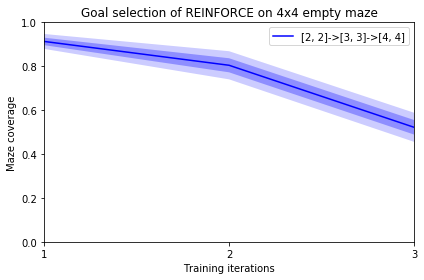

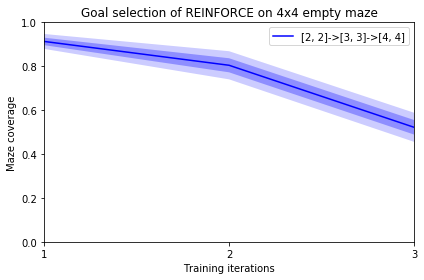

In [15]:
import numpy as np
from lagom.core.plotter import Plotter

from glob import glob  # matching pathnames with patterns

def plotting():
    # Create a plotter
    plotter = Plotter()

    # Needed info
    infos = ['Success rate over goal space']

    for info in infos:
        list_coverages = []
        for f in glob('logs/ID_*_eval.npy'):
            coverages = list(np.load(f).item()[info].values())
            list_coverages.append(coverages)

    # Add curve of coverages over different random seeds
    plotter.add_curve(list_coverages, 
                      color='blue', 
                      label='[2, 2]->[3, 3]->[4, 4]', 
                      uncertainty=True, 
                      scales=[0.5, 1.0], 
                      alphas=[0.3, 0.2])

    title = 'Goal selection of REINFORCE on 4x4 empty maze'
    xlabel = 'Training iterations'
    ylabel = 'Maze coverage'
    xlim = [1, 3]
    ylim = [0, 1]
    fig = plotter.plot(title, xlabel, ylabel, xlim=xlim, ylim=ylim, log_x=False, integer_x=True)

    return fig



fig = plotting()
fig

In [3]:
plot

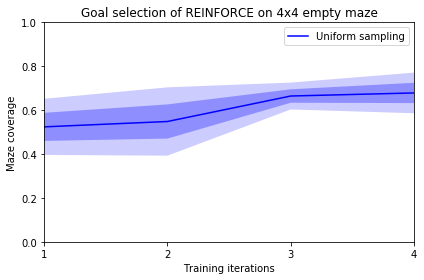

# Visualization of learning dynamics
### Average over different random seeds

/home/zuo/anaconda3/envs/RL/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


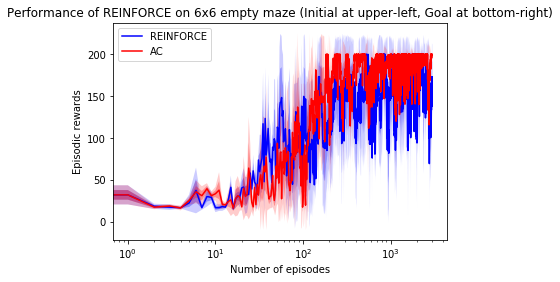

In [102]:
import numpy as np
from plotter import Plotter

from glob import glob  # matching pathnames with patterns

plotter = Plotter()

scales = [0.5, 1.0]
alphas = [0.3, 0.2]

data = []
for filepath in glob('logs/REINFORCE/*.npy'):
    data.append(np.load(filepath))
plotter.add_curve(data, 
                  color='blue', 
                  label='REINFORCE', 
                  uncertainty=True, 
                  scales=scales, 
                  alphas=alphas)

data = []
for filepath in glob('logs/ActorCritic/*.npy'):
    data.append(np.load(filepath))
plotter.add_curve(data, 
                  color='red', 
                  label='AC', 
                  uncertainty=True, 
                  scales=scales, 
                  alphas=alphas)

title = 'Performance of REINFORCE on 6x6 empty maze (Initial at upper-left, Goal at bottom-right)'
xlabel = 'Number of episodes'
ylabel = 'Episodic rewards'
fig = plotter.plot(title, xlabel, ylabel, log_x=True)
fig.show()

fig.savefig('logs/tmp.png')